# This notebook is to go over all of my data analysis using Chandra Source Catalog.

## This notebook is running ciao-4.14

Packages to install:

 - `pip install astropy pyvo pyyaml matplotlib`


In [215]:
import numpy as np
import pyvo as vo
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import astropy
import scipy
import time
from astropy.coordinates import SkyCoord
from astropy import units as u
from ciao_contrib.cda.search import search_chandra_archive, get_chandra_obs
from ciao_contrib.region.check_fov import FOVFiles
from ciao_contrib.runtool import *
import ciao_contrib.runtool as rt
import sherpa.utils
from astropy.io import fits



#putting all of my fucnctions in here
import cscFunctions as cf
#cf.test(1)

%matplotlib inline

Here we read in the data, and then can check CSC if there is something nearby.



In [8]:
#import data here

galaxiesFull = pd.read_csv("mag_change.txt", delim_whitespace=True)  
raGalaxies = galaxiesFull["My_RA"] #right ascention
decGalaxies = galaxiesFull["My_DEC"] #decllination


Here is the link to see the Chandra Ciao Scripts: https://cxc.cfa.harvard.edu/ciao/download/scripts/contents.html#PythonModules

In [4]:
#use the script

for plotting

12.58164
Count = 21
No of unique items are: 0


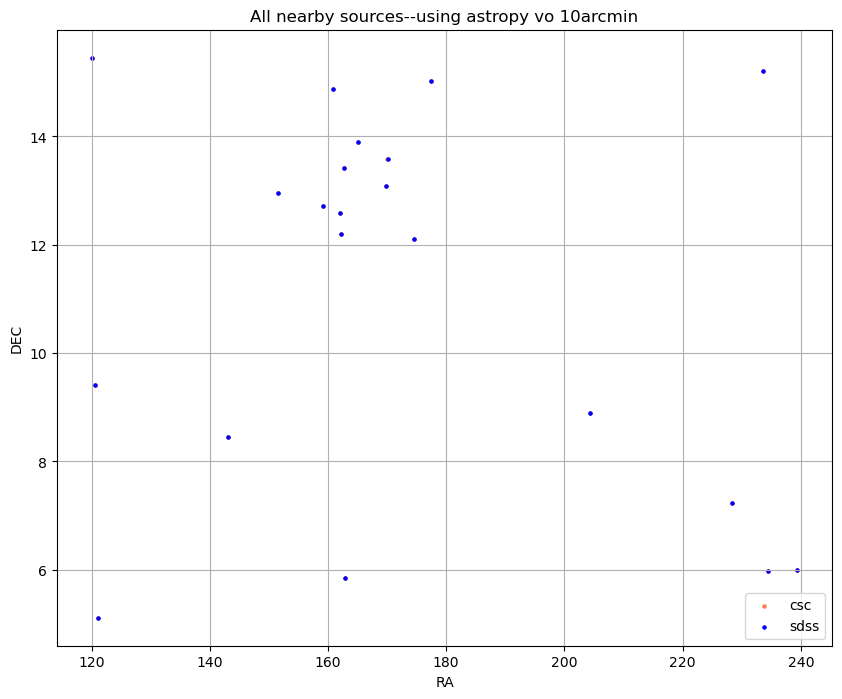

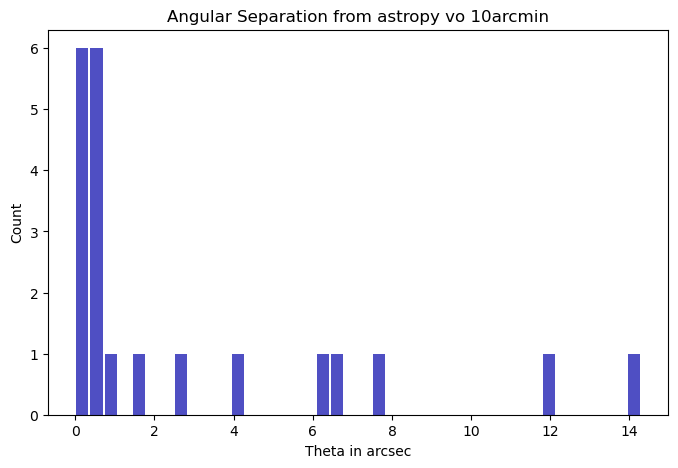

finished
Numpy: 0.2519838809967041 seconds


In [128]:
start = time.time() #start a time to see how long it takes

galaxiesFull = pd.read_csv("mag_change.txt", delim_whitespace=True)
sdssRA = galaxiesFull["SDSS_RA"] #right ascention
sdssDEC = galaxiesFull["SDSS_DEC"] #decllination


#first example
csc10am= pd.read_csv("csc10arcmin.txt", delim_whitespace=True) 
matches = csc10am['Num']
cscRA  = csc10am['CSC_RA']
cscMyRA = csc10am['My_RA']
cscDEC = csc10am['CSC_DEC']
cscMyDEC = csc10am['My_DEC']
print(cscMyDEC[3])

"""
fig = plt.figure(figsize =(10, 10))
plt.title("All nearby sources")
plt.scatter(sdssRA, sdssDEC, s = 5, color = 'r', label ='sdss')
plt.scatter(cscRA, cscDEC, s = 5, color = 'b', label = 'csc')
plt.legend()
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  
"""

cscMyRAnew = []
cscMyDECnew = []
cscRAnew  = []
cscDECnew = []
angSep = []
idx = 0
count = 0
for i in range(np.size(cscRA)):
    num = matches[i]
    if idx == num:
        continue
    else:

        #angular separation
        thetaRad = np.sin(cscMyDEC[i]*np.pi/180)* np.sin(cscDEC[i]*np.pi/180) + np.cos(cscMyDEC[i]*np.pi/180)*np.cos(cscDEC[i]*np.pi/180)*np.cos(np.absolute(cscMyRA[i]-cscRA[i])*np.pi/180) #returns answer in rad
        theta_arcsec = np.arccos(thetaRad) * 206265
        if theta_arcsec < 15:
            cscMyRAnew.append(cscMyRA[i])
            cscMyDECnew.append(cscMyDEC[i])
            cscRAnew.append(cscRA[i])
            cscDECnew.append(cscDEC[i])
            angSep.append(theta_arcsec)         
            count = count +1
        #print("d1 =",cscMyDEC[i], "d2 = ", cscDEC[i], "angSep=", theta_arcsec)       
    idx = num

print("Count =", count)

#comment out 
"""
print("Writing file")
with open(r'checksdsspics10arcsec.txt', 'w') as fp:
    fp.write("Num\t\t\t\tSDSS_RA\t\t\t\tCSC_RA\t\t\tSDSS_DEC\t\t\tCSC_DEC\t\tAngular_Separation\n")
    for i in range(count):
        fp.write("%3d\t%12.6f\t%12.6f\t%12.6f\t%12.6f\t%12.6f\n" %( (i) ,(cscMyRAnew[i]), (cscRAnew[i]), (cscMyDECnew[i]), (cscDECnew[i]), (angSep[i]) ) )
"""              
#comment out


# taking an input list
#uniqueNums = []
# taking an counter
sum = 0
 
# traversing the array
"""
for item in matches:
    if item not in uniqueNums:
        sum += 1
        uniqueNums.append(item)
 """
# printing the output
print("No of unique items are:", sum)
#categories = np.array(len(cscMyRAnew))

# use colormap
#colormap = np.array(['r', 'g', 'b'])

fig = plt.figure(figsize =(10, 8))
plt.title("All nearby sources--using astropy vo 10arcmin")
#plt.scatter(cscMyRAnew, cscMyDECnew, s = 5, c= cscDECnew, label ='sdss')
#plt.scatter(cscRAnew, cscDECnew, s = 5, c = cscDECnew, label = 'csc')
plt.scatter(cscRAnew, cscDECnew, s = 5, color = "coral", label = 'csc')
plt.scatter(cscMyRAnew, cscMyDECnew, s = 5, color = "b", label ='sdss')
plt.legend()
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.xlim(10,30)
#plt.ylim(10,30)
plt.grid()
plt.show()  


#histogram

fig = plt.figure(figsize =(8, 5))

n, bins, patches = plt.hist(x=angSep, bins = 40, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Theta in arcsec')
plt.ylabel('Count')
plt.title('Angular Separation from astropy vo 10arcmin')
#plt.axvline(2.6, color='k', linestyle='dashed', linewidth=1)

plt.show()  

print("finished")
print(f'Numpy: {time.time() - start} seconds')


Change this cell to more other things

In [9]:
#code for othert things

Here is where I will grab position offsets, off axis data, etc

In [27]:
#search cone
cone = vo.dal.SCSService('https://cda.cfa.harvard.edu/csc21_snapshot_scs/coneSearch')


#other

In [40]:
#cross matching sdss and chandra


#import packages



#import sdss coordinates
sdssCoords = pd.read_csv('mag_change.txt', delim_whitespace=True)
port_coords = SkyCoord(sdssCoords['My_RA']*u.deg, sdssCoords['My_DEC']*u.deg)


#data release 2.1
cone = vo.dal.SCSService('https://cda.cfa.harvard.edu/csc21_snapshot_scs/coneSearch') 

#query parameters
qry = '''SELECT DISTINCT m.name,m.ra,m.dec,m.err_ellipse_r0,m.err_ellipse_r1,m.err_ellipse_ang,m.err_ellipse_ang,m.
FROM csc21_snapshot.master_source m'''


"""
,
 'gal_b',
 'gal_l',
 'extent_flag',
 'conf_flag',
 'pileup_flag',
 'var_flag',
 'streak_src_flag',
 'sat_src_flag',
 'man_add_flag',
 'man_inc_flag',
 'man_reg_flag',
 'man_match_flag',
 'man_pos_flag',
 'var_inter_hard_flag',
 'major_axis_b',
 'major_axis_h',
 'major_axis_m',
 'major_axis_s',
 'major_axis_u',
 'major_axis_w',
 'major_axis_lolim_b',
 'major_axis_lolim_h',
 'major_axis_lolim_m',
 'major_axis_lolim_s',
 'major_axis_lolim_u',
 'major_axis_lolim_w',
 'major_axis_hilim_b',
 'major_axis_hilim_h',
 'major_axis_hilim_m',
 'major_axis_hilim_s',
 'major_axis_hilim_u',
 'major_axis_hilim_w',
 'minor_axis_b',
 'minor_axis_h',
 'minor_axis_m',
 'minor_axis_s',
 'minor_axis_u',
 'minor_axis_w',
 'minor_axis_lolim_b',
 'minor_axis_lolim_h',
 'minor_axis_lolim_m',
 'minor_axis_lolim_s',
 'minor_axis_lolim_u',
 'minor_axis_lolim_w'

 """
#new data release 2.1

tap = vo.dal.TAPService('http://cda.cfa.harvard.edu/csc21_snapshot_tap/') 
print('Querying...')

cat = tap.search(qry)

#print(np.size(cat))
"""
print('Writing first file...')
import sys
import re
with open('csc21crossmatch.txt','w') as f:
    f.write('Target_Name\t\t\t\t\tCSC_RA\t\t\t\tCSC_DEC\n')
    for i in range(len(cat['ra'])):
        f.write(f'{re.sub(" ","",cat["name"][i])},{cat["ra"][i]},{cat["dec"][i]}\n')

#sys.exit()
"""
CSC_21_coords = SkyCoord(ra = cat['ra'] * u.deg, dec = cat['dec']*u.deg)

#can add argument to change to the second, third, etc nearest neighbor
#idx_ is an array of indices into port coords matching the shape of CSC_21_coords
#describing which items in port_coords each item of CSC_21_coords matched to
idx_,sep2d_,_ = CSC_21_coords.match_to_catalog_sky(port_coords)

sep_mask = [True if i <= 10*u.arcmin else False for i in sep2d_]

idx_matches = idx_[sep_mask]
CSC_21_coords_matches = CSC_21_coords[sep_mask]

SDSS_mask = [True if i in idx_matches else False for i in range(len(port_coords))]
port_matches = port_coords[SDSS_mask]

CSC_names_matches = cat['name'][sep_mask]

"""
SDSS_bIDs = sdssCoords['bestObjID']
SDSS_sIDS = sdssCoords['specObjID']
SDSS_zs = sdssCoords['z']

SDSS_bIDs_matches = [SDSS_bIDs[i] for i in idx_matches]

SDSS_sIDS_matches = [SDSS_sIDS[i] for i in idx_matches]

SDSS_zs_matches = [SDSS_zs[i] for i in idx_matches]
"""

CSC_RA_matches = [i.ra.deg for i in CSC_21_coords_matches]
CSC_dec_matches = [i.dec.deg for i in CSC_21_coords_matches]

SDSS_RA_matches = [port_coords[i].ra.deg for i in idx_matches]
SDSS_dec_matches = [port_coords[i].dec.deg for i in idx_matches]

"""
print("Writing second file...")
with open('CSC21_SDSS_10arcmin_index.txt','w') as f:
    f.write('Num\t\tTarget_Name\t\t\t\tCSC_RA\t\tSDSS_RA\t\tCSC_DEC\t\tSDSS_DEC\n')
    for i in range(np.size(CSC_names_matches)):
        #f.write(f'{re.sub(" ","",cat["name"][i])},{cat["ra"][i]},{cat["dec"][i]}\n')
        f.write("%7d\t%27s\t%12.6f\t%12.6f\t%12.6f\t%12.6f\n" % ( (idx_matches[i]), (CSC_names_matches[i]).replace(" ", "") , (CSC_RA_matches[i]), (SDSS_RA_matches[i]), (CSC_dec_matches[i]), (SDSS_dec_matches[i]) ) )
"""



"""

print("Writing third file...")
with open('CSC21_coords.txt','w') as f:
    f.write('Target_Name\t\t\t\tCSC_RA\t\t\tSDSS_RA\t\t\tCSC_DEC\t\t\tSDSS_DEC\n')
    for i in range(len(cat['ra'])):
        #f.write(f'{re.sub(" ","",cat["name"][i])},{cat["ra"][i]},{cat["dec"][i]}\n')
        f.write("%27s\t%12.6f\t%12.6f\t%12.6f\t%12.6f\n" % ( (CSC_names_matches[i]), (CSC_RA_matches[i]), (SDSS_RA_matches[i]), (CSC_dec_matches[i]), (SDSS_dec_matches[i]) ) )



  fp.write("%4d\t%7s\t%27s\t%12.6f\t%12.6f\t%12.6f\t%12.6f\t%9s\t%21s\n" %( (j+1) ,(obs['obsid'][i]), (obs['target'][i]).replace(" ", "") , (raGalaxies[j]), (obs['ra'][i]), (decGalaxies[j]), (obs['dec'][i]), (obs['instrument'][i]), (obs['obsdate'][i]) ) )
                    
#save the full match CSV
csv_out = np.column_stack((CSC_names_matches,CSC_RA_matches,CSC_dec_matches,SDSS_RA_matches,SDSS_dec_matches))
header = 'CSC NAME,CSC RA,CSC DEC,SDSS RA,SDSS DEC'
np.savetxt('CSC21_SDSS_10arcmin_crossmatch.csv',csv_out,fmt='%s',delimiter=',',header=header)


#save the coords doc which will be used by full process
header_2 = 'name  ra  dec'
coords_out = np.column_stack((CSC_names_matches,CSC_RA_matches,CSC_dec_matches))
np.savetxt('CSC21_coords.csv',coords_out,fmt='%s',delimiter='  ',header=header_2)

"""

Querying...


'\n\nprint("Writing third file...")\nwith open(\'CSC21_coords.txt\',\'w\') as f:\n    f.write(\'Target_Name\t\t\t\tCSC_RA\t\t\tSDSS_RA\t\t\tCSC_DEC\t\t\tSDSS_DEC\n\')\n    for i in range(len(cat[\'ra\'])):\n        #f.write(f\'{re.sub(" ","",cat["name"][i])},{cat["ra"][i]},{cat["dec"][i]}\n\')\n        f.write("%27s\t%12.6f\t%12.6f\t%12.6f\t%12.6f\n" % ( (CSC_names_matches[i]), (CSC_RA_matches[i]), (SDSS_RA_matches[i]), (CSC_dec_matches[i]), (SDSS_dec_matches[i]) ) )\n\n\n\n  fp.write("%4d\t%7s\t%27s\t%12.6f\t%12.6f\t%12.6f\t%12.6f\t%9s\t%21s\n" %( (j+1) ,(obs[\'obsid\'][i]), (obs[\'target\'][i]).replace(" ", "") , (raGalaxies[j]), (obs[\'ra\'][i]), (decGalaxies[j]), (obs[\'dec\'][i]), (obs[\'instrument\'][i]), (obs[\'obsdate\'][i]) ) )\n                    \n#save the full match CSV\ncsv_out = np.column_stack((CSC_names_matches,CSC_RA_matches,CSC_dec_matches,SDSS_RA_matches,SDSS_dec_matches))\nheader = \'CSC NAME,CSC RA,CSC DEC,SDSS RA,SDSS DEC\'\nnp.savetxt(\'CSC21_SDSS_10arcmin_cros

In [42]:
cat

<Table length=360915>
         name                 ra         ...  err_ellipse_ang  
                             deg         ...        deg        
        object             float64       ...      float64      
--------------------- ------------------ ... ------------------
2CXO J232251.5+584748 350.71483395705764 ...  55.91771829182403
2CXO J232251.7+585018 350.71555119359664 ...  5.093341893615474
2CXO J232304.0+584833 350.76678049556654 ...   98.6900551288316
2CXO J232305.7+584512 350.77401548043827 ... 42.500827655515536
2CXO J232307.9+584611  350.7832244624948 ...  153.2365576622047
2CXO J232312.8+584509 350.80368240909513 ...  35.09919344986571
2CXO J232314.1+584655 350.80899515802275 ...  6.477223699583703
2CXO J232316.2+584602  350.8178794175068 ...  80.87311579016654
2CXO J232319.5+584649 350.83163266497695 ...   83.8734237133221
                  ...                ... ...                ...
2CXO J114952.7+222923  177.4697862011502 ...  60.20191591739237
2CXO J114931.2+221

In [208]:
#other try

galaxiesFull = pd.read_csv("mag_change.txt", delim_whitespace=True)
sdssRA = galaxiesFull["SDSS_RA"] #right ascention
sdssDEC = galaxiesFull["SDSS_DEC"] #decllination
myRA = galaxiesFull["My_RA"] #right ascention
myDEC = galaxiesFull["My_DEC"] #decllination

maxrad = 0.1 * u.deg #0.05 

#2.1 data relesaes
cone = vo.dal.SCSService('https://cda.cfa.harvard.edu/csc21_snapshot_scs/coneSearch') 

count = 0
#with open('csctutorials_test.txt','w') as f:
        
for i in range(np.size(cscRA)):#(np.size(sdssRA)):
    results = cone.search(pos=[sdssRA[i],sdssDEC[i]], radius=maxrad, verbosity=3)
    if len(results)==0:
        continue
        #print("empty") 
        #print(i)
        #print(np.size(results))
    else:
        #print("not empty")
        count = count + 1


            #print(i)
            #print(results)
print(count)

104


In [187]:
#other try

maxrad = 0.01 * u.deg 

#2.1 data relesaes
cone = vo.dal.SCSService('https://cda.cfa.harvard.edu/csc21_snapshot_scs/coneSearch') 

results1 = cone.search(pos=[sdssRA[0:300],sdssDEC[0:300]], radius=maxrad, verbosity=3)
tbl1 = results1.to_table()

results2  = cone.search(pos=[sdssRA[300:600],sdssDEC[300:600]], radius=maxrad, verbosity=3)
tbl2 = results2.to_table()


results3= cone.search(pos=[sdssRA[600:900],sdssDEC[600:900]], radius=maxrad, verbosity=3)
tbl3 = results3.to_table()

results4  = cone.search(pos=[sdssRA[900:1200],sdssDEC[900:1200]], radius=maxrad, verbosity=3)
tbl4 = results4.to_table()


results5  = cone.search(pos=[sdssRA[1200:],sdssDEC[1200:]], radius=maxrad, verbosity=3)
tbl5 = results5.to_table()

print(tbl1,tbl2,tbl3,tbl4,tbl5)

         name                 ra         ... hrc_hetg_time hrc_letg_time
                             deg         ...       s             s      
--------------------- ------------------ ... ------------- -------------
2CXO J080224.6+092448 120.60279946532074 ...            --            -- name  ra dec err_ellipse_r0 ... hrc_time hrc_hetg_time hrc_letg_time
     deg deg     arcsec     ...    s           s             s      
---- --- --- -------------- ... -------- ------------- ------------- name  ra dec err_ellipse_r0 ... hrc_time hrc_hetg_time hrc_letg_time
     deg deg     arcsec     ...    s           s             s      
---- --- --- -------------- ... -------- ------------- ------------- name  ra dec err_ellipse_r0 ... hrc_time hrc_hetg_time hrc_letg_time
     deg deg     arcsec     ...    s           s             s      
---- --- --- -------------- ... -------- ------------- ------------- name  ra dec err_ellipse_r0 ... hrc_time hrc_hetg_time hrc_letg_time
     deg deg     a

In [203]:

csc10as= pd.read_csv("CSC21_SDSS_10arcsec_cx.txt", delim_whitespace=True) 
targetName = csc10as['Target_Name']
cscRA  = csc10as['CSC_RA']
sdssRA = csc10as['SDSS_RA']
cscDEC = csc10as['CSC_DEC']
sdssDEC = csc10as['SDSS_DEC']

#print(cscDEC[3])

#other try

maxrad = 0.05 * u.deg 

#2.1 data relesaes
cone = vo.dal.SCSService('https://cda.cfa.harvard.edu/csc21_snapshot_scs/coneSearch') 


results = cone.search(pos=[sdssRA[1],sdssDEC[1]], radius=maxrad, verbosity=3)
tbl = results.to_table()
tbl

name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,gal_b,gal_l,extent_flag,conf_flag,pileup_flag,var_flag,streak_src_flag,sat_src_flag,man_add_flag,man_inc_flag,man_reg_flag,man_match_flag,man_pos_flag,var_inter_hard_flag,major_axis_b,major_axis_h,major_axis_m,major_axis_s,major_axis_u,major_axis_w,major_axis_lolim_b,major_axis_lolim_h,major_axis_lolim_m,major_axis_lolim_s,major_axis_lolim_u,major_axis_lolim_w,major_axis_hilim_b,major_axis_hilim_h,major_axis_hilim_m,major_axis_hilim_s,major_axis_hilim_u,major_axis_hilim_w,minor_axis_b,minor_axis_h,minor_axis_m,minor_axis_s,minor_axis_u,minor_axis_w,minor_axis_lolim_b,minor_axis_lolim_h,minor_axis_lolim_m,minor_axis_lolim_s,minor_axis_lolim_u,minor_axis_lolim_w,minor_axis_hilim_b,minor_axis_hilim_h,minor_axis_hilim_m,minor_axis_hilim_s,minor_axis_hilim_u,minor_axis_hilim_w,pos_angle_b,pos_angle_h,pos_angle_m,pos_angle_s,pos_angle_u,pos_angle_w,pos_angle_lolim_b,pos_angle_lolim_h,pos_angle_lolim_m,pos_angle_lolim_s,pos_angle_lolim_u,pos_angle_lolim_w,pos_angle_hilim_b,pos_angle_hilim_h,pos_angle_hilim_m,pos_angle_hilim_s,pos_angle_hilim_u,pos_angle_hilim_w,src_area_b,src_area_h,src_area_m,src_area_s,src_area_u,src_area_w,phot_nsrcs,photflux_aper_b,photflux_aper_h,photflux_aper_m,photflux_aper_s,photflux_aper_u,photflux_aper_w,photflux_aper_lolim_b,photflux_aper_lolim_h,photflux_aper_lolim_m,photflux_aper_lolim_s,photflux_aper_lolim_u,photflux_aper_lolim_w,photflux_aper_hilim_b,photflux_aper_hilim_h,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_u,photflux_aper_hilim_w,photflux_aper90_b,photflux_aper90_h,photflux_aper90_m,photflux_aper90_s,photflux_aper90_u,photflux_aper90_w,photflux_aper90_lolim_b,photflux_aper90_lolim_h,photflux_aper90_lolim_m,photflux_aper90_lolim_s,photflux_aper90_lolim_u,photflux_aper90_lolim_w,photflux_aper90_hilim_b,photflux_aper90_hilim_h,photflux_aper90_hilim_m,photflux_aper90_hilim_s,photflux_aper90_hilim_u,photflux_aper90_hilim_w,flux_aper_b,flux_aper_h,flux_aper_m,flux_aper_s,flux_aper_u,flux_aper_w,flux_aper_lolim_b,flux_aper_lolim_h,flux_aper_lolim_m,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_w,flux_aper_hilim_b,flux_aper_hilim_h,flux_aper_hilim_m,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_w,flux_aper90_b,flux_aper90_h,flux_aper90_m,flux_aper90_s,flux_aper90_u,flux_aper90_w,flux_aper90_lolim_b,flux_aper90_lolim_h,flux_aper90_lolim_m,flux_aper90_lolim_s,flux_aper90_lolim_u,flux_aper90_lolim_w,flux_aper90_hilim_b,flux_aper90_hilim_h,flux_aper90_hilim_m,flux_aper90_hilim_s,flux_aper90_hilim_u,flux_aper90_hilim_w,photflux_aper_avg_b,photflux_aper_avg_h,photflux_aper_avg_m,photflux_aper_avg_s,photflux_aper_avg_u,photflux_aper_avg_w,photflux_aper_avg_lolim_b,photflux_aper_avg_lolim_h,photflux_aper_avg_lolim_m,photflux_aper_avg_lolim_s,photflux_aper_avg_lolim_u,photflux_aper_avg_lolim_w,photflux_aper_avg_hilim_b,photflux_aper_avg_hilim_h,photflux_aper_avg_hilim_m,photflux_aper_avg_hilim_s,photflux_aper_avg_hilim_u,photflux_aper_avg_hilim_w,photflux_aper90_avg_b,photflux_aper90_avg_h,photflux_aper90_avg_m,photflux_aper90_avg_s,photflux_aper90_avg_u,photflux_aper90_avg_w,photflux_aper90_avg_lolim_b,photflux_aper90_avg_lolim_h,photflux_aper90_avg_lolim_m,photflux_aper90_avg_lolim_s,photflux_aper90_avg_lolim_u,photflux_aper90_avg_lolim_w,photflux_aper90_avg_hilim_b,photflux_aper90_avg_hilim_h,photflux_aper90_avg_hilim_m,photflux_aper90_avg_hilim_s,photflux_aper90_avg_hilim_u,photflux_aper90_avg_hilim_w,flux_aper_avg_b,flux_aper_avg_h,flux_aper_avg_m,flux_aper_avg_s,flux_aper_avg_u,flux_aper_avg_w,flux_aper_avg_lolim_b,flux_aper_avg_lolim_h,flux_aper_avg_lolim_m,flux_aper_avg_lolim_s,flux_aper_avg_lolim_u,flux_aper_avg_lolim_w,flux_aper_avg_hilim_b,flux_aper_avg_hilim_h,flux_aper_avg_hilim_m,flux_aper_avg_hilim_s,flux_aper_avg_hilim_u,flux_aper_avg_hilim_w,flux_aper90_avg_b,flux_aper90_avg_h,flux_aper90_avg_m,flux_aper90_avg_s,flux_aper90_avg_u,flux_aper90_avg_w,flux_aper90_avg_lolim_b,flux_aper90_avg_lolim_h,flux_aper9

In [211]:
for key in tbl.keys():
    if tbl[key].dtype == 'O':
        tbl[key] = [str(n) for n in tbl[key]]

#tbl.write('test.txt', format='txt', overwrite=True)

In [109]:
#write to a table
tbl = results.to_table()

In [213]:
tbl.keys()

['name',
 'ra',
 'dec',
 'err_ellipse_r0',
 'err_ellipse_r1',
 'err_ellipse_ang',
 'gal_b',
 'gal_l',
 'extent_flag',
 'conf_flag',
 'pileup_flag',
 'var_flag',
 'streak_src_flag',
 'sat_src_flag',
 'man_add_flag',
 'man_inc_flag',
 'man_reg_flag',
 'man_match_flag',
 'man_pos_flag',
 'var_inter_hard_flag',
 'major_axis_b',
 'major_axis_h',
 'major_axis_m',
 'major_axis_s',
 'major_axis_u',
 'major_axis_w',
 'major_axis_lolim_b',
 'major_axis_lolim_h',
 'major_axis_lolim_m',
 'major_axis_lolim_s',
 'major_axis_lolim_u',
 'major_axis_lolim_w',
 'major_axis_hilim_b',
 'major_axis_hilim_h',
 'major_axis_hilim_m',
 'major_axis_hilim_s',
 'major_axis_hilim_u',
 'major_axis_hilim_w',
 'minor_axis_b',
 'minor_axis_h',
 'minor_axis_m',
 'minor_axis_s',
 'minor_axis_u',
 'minor_axis_w',
 'minor_axis_lolim_b',
 'minor_axis_lolim_h',
 'minor_axis_lolim_m',
 'minor_axis_lolim_s',
 'minor_axis_lolim_u',
 'minor_axis_lolim_w',
 'minor_axis_hilim_b',
 'minor_axis_hilim_h',
 'minor_axis_hilim_m',
 'mi

In [179]:
#save as a fits file
#results.fieldnames

results['ra'].description

AttributeError: 'MaskedArray' object has no attribute 'description'

In [214]:
results['err_ellipse_r0']

masked_array(data=[],
             mask=[],
       fill_value=1e+20,
            dtype=float64)

Making plots of the error of position which are ellipses.

In [220]:
tbl['ra'][1]

161.91982408151728

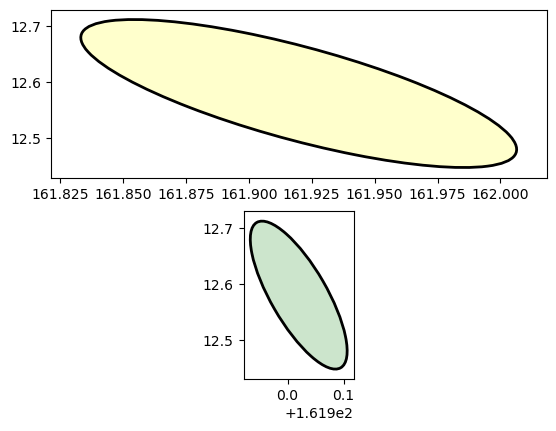

In [227]:
#plot of ellipses


i = 1

xcenter, ycenter = tbl['ra'][i], tbl['dec'][i]
semimajor, semiminor = tbl['err_ellipse_r0'][i], tbl['err_ellipse_r1'][i]
angle = tbl['err_ellipse_ang'][i]

theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
rtheta = np.radians(angle)

R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])



In [ ]:
xcenter, ycenter = tbl['ra'][i], tbl['dec'][i]
width, height = 1e-1, 3e-1
angle = 30
theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = 0.5 * width * np.cos(theta)
y = 0.5 * height * np.sin(theta)

rtheta = np.radians(angle)
R = np.array([
    [np.cos(rtheta), -np.sin(rtheta)],
    [np.sin(rtheta),  np.cos(rtheta)],
    ])


x, y = np.dot(R, np.array([x, y]))
x += xcenter
y += ycenter

fig = plt.figure()
ax = fig.add_subplot(211, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='yellow',
        edgecolor='yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='green', edgecolor='green', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)

In [136]:
#write all the close ones in a afile

cscMyRA = csc10am['My_RA']
cscDEC = csc10am['CSC_DEC']
cscMyDEC = csc10am['My_DEC']

cscMyRAnew = []
cscMyDECnew = []
cscRAnew  = []
cscDECnew = []
angSep = []
idx = 0
count = 0
for i in range(np.size(cscRA)):
    #num = matches[i]
    #if idx == num:
    #    continue
    #else:

        #angular separation
        thetaRad = np.sin(cscMyDEC[i]*np.pi/180)* np.sin(results['dec'][i]*np.pi/180) + np.cos(cscMyDEC[i]*np.pi/180)*np.cos(results['dec'][i]*np.pi/180)*np.cos(np.absolute(cscMyRA[i]-results['ra'][i])*np.pi/180) #returns answer in rad
        theta_arcsec = np.arccos(thetaRad) * 206265
        if theta_arcsec < 600:
            cscMyRAnew.append(cscMyRA[i])
            cscMyDECnew.append(cscMyDEC[i])
            cscRAnew.append(results['ra'][i])
            cscDECnew.append(results['dec'][i])
            angSep.append(theta_arcsec)         
            count = count +1
        #print("d1 =",cscMyDEC[i], "d2 = ", cscDEC[i], "angSep=", theta_arcsec)       
    #idx = num
        
print("Count =", count)

print("Writing second file...")
with open('test_csctutorials.txt','w') as f:
    f.write('Target_Name\t\t\t\tCSC_RA\t\tSDSS_RA\t\tCSC_DEC\t\tSDSS_DEC\n')
    for i in range(np.size(count)):
        #f.write(f'{re.sub(" ","",cat["name"][i])},{cat["ra"][i]},{cat["dec"][i]}\n')
        f.write("%27s\t%12.6f\t%12.6f\t%12.6f\t%12.6f\n" % ( ([i]), (cscMyRAnew[i]), (cscMyDECnew[i]), (cscRAnew[i]), (cscDECnew[i]), (angSep[i]) ) )


IndexError: index 48 is out of bounds for axis 0 with size 48

In [116]:
np.sin(results['ra'][3])

0.959671532322094

In [121]:
np.sin(209.2* u.deg)

<Quantity -0.48785966>

In [118]:
results['ra'][3]

209.20087632235402

In [129]:
np.size(cscMyDEC[3])

1

In [133]:
np.sin(cscMyDEC[i]*np.pi/180)

0.21700512124582175

In [132]:
cscMyDEC = csc10am['My_DEC']

In [134]:
cscMyDEC[3]

12.58164